# TP1 - Introduction aux graphes

Dans ce TP, on voir comment dessiner un graphe en python avec la bibliothèque `networkx`, puis on utilisera les fonctions de cette bibliothèque pour exécuter quelques algorithmes de graphe.

## I. Exemples et premières définitions

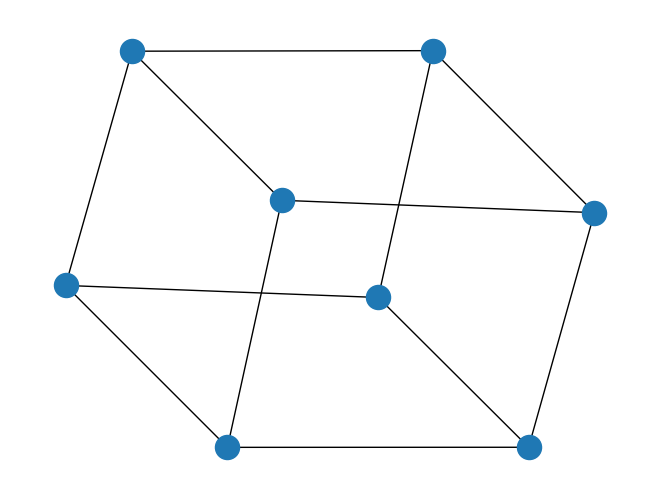

In [11]:
import matplotlib.pyplot as plt 
import networkx as nx

# un exemple de graphe un peu compliqué
nx.draw(nx.hypercube_graph(3))

**Question 1.a.** Lisez la documentation de cette fonction en exécutant soit `help(nx.hypercube_graph)` soit `nx.hypercube_graph?`.

*Retenez bien cette façon d'accéder à la documentation d'une fonction directement depuis un notebook Python. Usez et abusez de ces commandes, et essayez d'apprendre à les utiliser sans avoir recours à Internet.*

In [12]:
nx.hypercube_graph?

Signature: nx.hypercube_graph(n, *, backend=None, **backend_kwargs)
Docstring:
Returns the *n*-dimensional hypercube graph.

The nodes are the integers between 0 and ``2 ** n - 1``, inclusive.

For more information on the hypercube graph, see the Wikipedia
article `Hypercube graph`_.

.. _Hypercube graph: https://en.wikipedia.org/wiki/Hypercube_graph

Parameters
----------
n : int
    The dimension of the hypercube.
    The number of nodes in the graph will be ``2 ** n``.

Returns
-------
NetworkX graph
    The hypercube graph of dimension *n*.
File:      c:\users\taffi\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\networkx\generators\lattice.py
Type:      function

**Question 1.b.** Exécutez la cellule ci-dessus (qui affiche le graphe) plusieurs fois d'affilée. Que remarquez vous ? Selon vous, est-ce que ces deux graphes sont les mêmes ?

*Réponse :*

Les graphes sont représentés différement mais ces graphes sont les mêmes.

De façon générale, on peut représenter un graphe par deux ensembles :

* un ensemble de points : les **sommets** ;
* un ensemble de liaison entre les sommets : les **arêtes**.

C'est une façon abstraite de représenter des liens entre des objets. On verra que cela permet de représenter beaucoup de choses différentes, et de raisonner dessus pour résoudre des problèmes plus ou moins difficiles.

Regardons un autre exemple, cette fois on va le définir nous-mêmes. Prenez bien le temps de lire et de comprendre chacune de ces lignes de code.

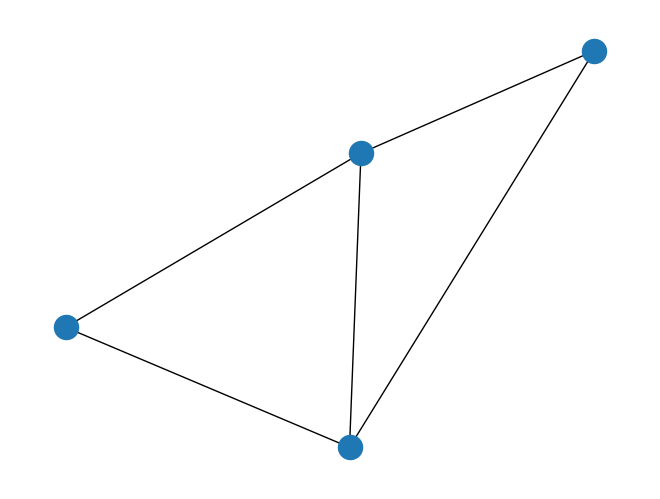

In [13]:
# définir un graphe vide
G = nx.Graph()

# sommets et aretes
sommets = [1, 2, 3, 4]
aretes = [(1,2), (2,3), (2,4), (4,1), (1,3)]

# rajouter des sommets
G.add_nodes_from(sommets)

# rajouter des arêtes
G.add_edges_from(aretes)

# afficher le graphe
nx.draw(G)

**Question 2.** Tracez le cube d'au dessus en définissant vous-mêmes ses sommets et arêtes. (Vous pouvez commencer par le dessiner sur papier pour voir quelles sont les arêtes à rajouter.)

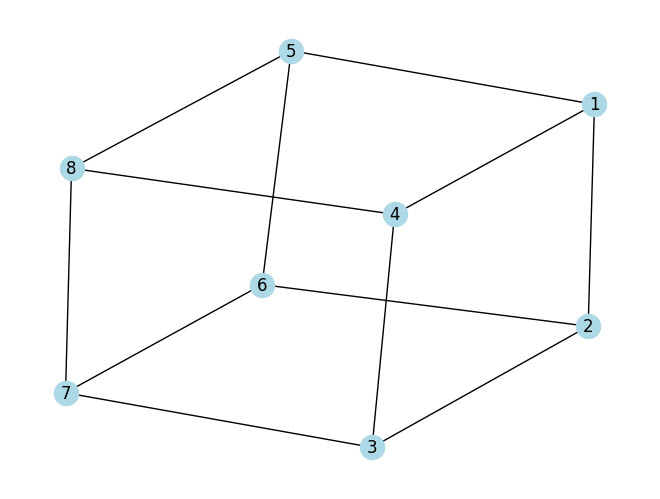

In [14]:
# définir un graphe vide
G_cube = nx.Graph()

# sommets (A COMPLETER)
sommets_cube = [1,2,3,4,5,6,7,8]

# aretes (A COMPLETER)
aretes_cube = [(1,2), (2,3), (3,4), (4,1), (1,5), (2,6), (3,7), (4,8), (5,6), (6,7), (7,8), (8,5)]

# il y a 8 sommets dans le cube
G_cube.add_nodes_from(sommets_cube)

# à vous de rajouter les bonnes arêtes !
G_cube.add_edges_from(aretes_cube)

# afficher le graphe (l'argument `with_labels` permet d'afficher les noms des sommets)
nx.draw(G_cube, with_labels=True, node_color="lightblue")

Quand les sommets ont un nom (ici un numéro), on parle d'**étiquette**, et on dit que le graphe est **étiqueté**. Les étiquettes ne sont pas nécessairement des chiffres, ça peut par exemple être des noms de villes !

Par exemple, si l'on prend quelques grandes villes françaises, on peut avoir ce graphe :

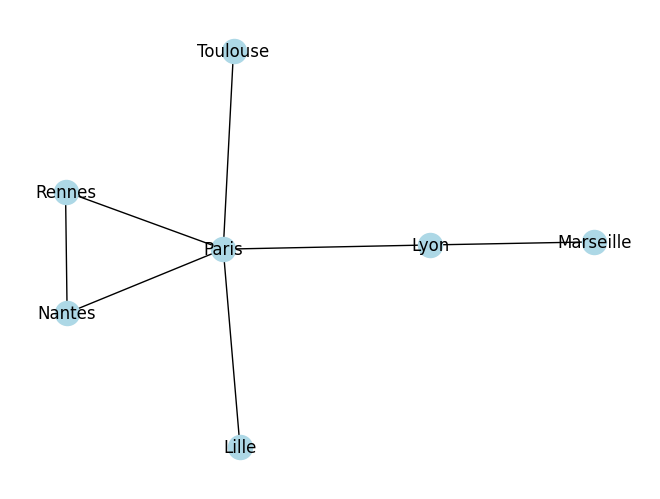

In [15]:
G_villes = nx.Graph()

villes = ["Lille", "Paris", "Lyon", "Marseille", "Nantes", "Rennes", "Toulouse"]
aretes_villes = [("Lille", "Paris"),
            ("Paris", "Lyon"),
            ("Paris", "Nantes"),
            ("Paris", "Rennes"),
            ("Paris", "Toulouse"),
            ("Lyon", "Marseille"),
            ("Nantes", "Rennes")]

G_villes.add_nodes_from(villes)
G_villes.add_edges_from(aretes_villes)

nx.draw(G_villes, with_labels=True, node_color="lightblue")

## II. Graphes pondérés

On peut se dire ici que les arêtes représentent les grands axes routiers. Mais toutes les villes ne sont pas à la même distance les unes des autres...

Bien sûr, il est possible d'encoder ces informations sur le graphe ! On rajoute donc un poids sur les arêtes, et on parle de **graphe pondéré**.

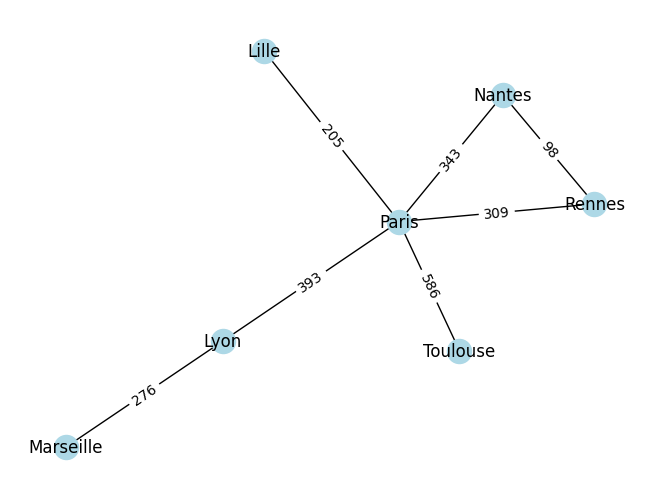

In [16]:
G_villes_pondere = nx.Graph()

# les distances entre chacune des villes
aretes_villes_poids = {("Lille", "Paris"): 205,
                  ("Paris", "Lyon"): 393,
                  ("Paris", "Nantes"): 343,
                  ("Paris", "Rennes"): 309,
                  ("Paris", "Toulouse"): 586,
                  ("Lyon", "Marseille"): 276,
                  ("Nantes", "Rennes"): 98}

# ajouter les sommets et arêtes
G_villes_pondere.add_nodes_from(villes)
G_villes_pondere.add_weighted_edges_from([(u, v, w) for ((u,v), w) in aretes_villes_poids.items()])

# on va afficher d'abord les noeuds, puis les arêtes
# pour pouvoir faire ça, il faut d'abord définir la position des sommets du graphe
pos = nx.spring_layout(G_villes_pondere) 
nx.draw(G_villes, pos, with_labels=True, node_color="lightblue")
nx.draw_networkx_edge_labels(G_villes_pondere, pos, edge_labels=aretes_villes_poids);

## III. Chemins dans un graphe

On peut se demander comment faire pour aller d'une ville à une autre. 

Dans ce cas, on considère qu'on peut se déplacer d'un sommet à un autre s'il existe une arête entre les deux. S'il existe une séquence de sommets $(S_1,\dots,S_k)$ avec des arêtes entre deux sommets consécutifs (entre $S_1$ et $S_2$, $S_2$ et $S_3$, etc.), on dit que cette séquence de sommets est un **chemin**.

Il existe des algorithmes qui permettent de trouver des chemins dans un graphe, soit entre deux sommets, soit entre toutes les paires de sommets, soit d'un sommet à tous les autres.

Pour l'instant, on ne va pas trop s'intéresser au fonctionnement de l'algorithme qui permet de trouver des chemins, on verra ça bientôt... mais regardons quand même par où on doit passer pour aller voir le soleil à Marseille !

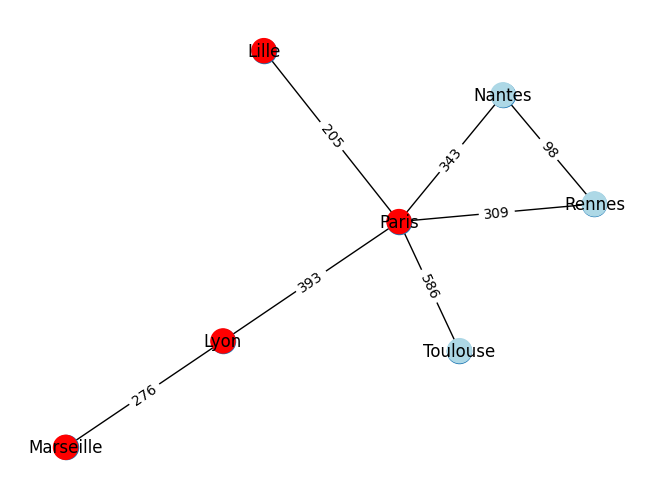

In [17]:
# un algorithme tout fait qui permet de trouver le chemin le plus court dans le graphe
court_chemin = nx.shortest_path(G_villes, "Lille", "Marseille", weight="weight")

# des couleurs pour afficher le chemin
couleurs = ["red" if sommet in court_chemin else "lightblue" for sommet in villes]

# affichage du graphe
nx.draw(G_villes_pondere, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_villes_pondere, pos, edge_labels=aretes_villes_poids)
nx.draw_networkx_nodes(G_villes_pondere, pos, node_color=couleurs)

Prenons maintenant un graphe avec un petit peu plus de villes :

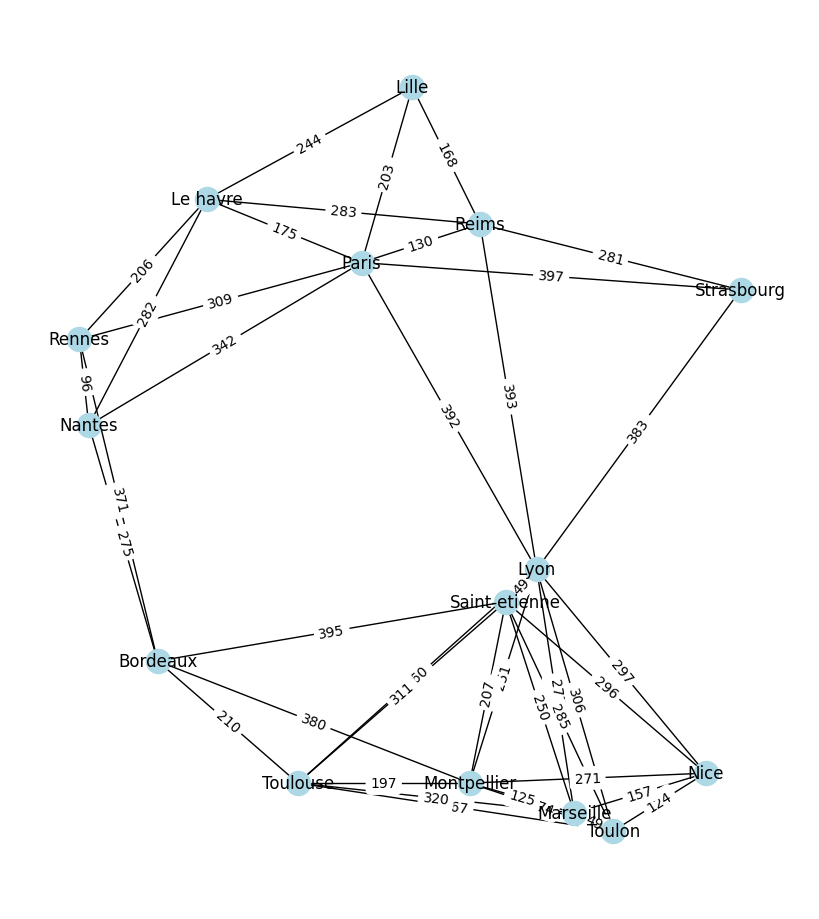

In [18]:
# charger le graphe depuis un fichier
G_grand = nx.read_gml("villes.gml")


# position et poids du graphe
pos_grand = {u: (p["x"], p["y"]) for u, p in G_grand.nodes(data=True)}
aretes_poids_grand = {(u,v,): int(d['weight']) for u, v, d in G_grand.edges(data=True)}

# affichage du graphe
plt.figure(figsize=(8, 9))
nx.draw(G_grand, pos_grand, node_color="lightblue", with_labels=True)
nx.draw_networkx_edge_labels(G_grand, pos_grand, edge_labels=aretes_poids_grand);

**Question 3.** Trouver et afficher le chemin le plus court entre Rennes et Nice.

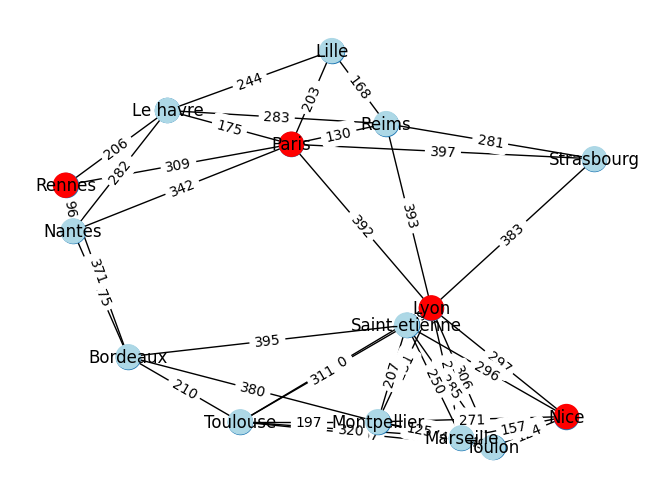

In [19]:
# un algorithme tout fait qui permet de trouver le chemin le plus court dans le graphe
court_chemin = nx.shortest_path(G_grand, "Rennes", "Nice", weight="weight")

# des couleurs pour afficher le chemin
couleurs = ["red" if sommet in court_chemin else "lightblue" for sommet in G_grand]

# affichage du graphe
nx.draw(G_grand, pos_grand, with_labels=True)
nx.draw_networkx_edge_labels(G_grand, pos_grand, edge_labels=aretes_poids_grand)
nx.draw_networkx_nodes(G_grand, pos_grand, node_color=couleurs)

## IV. Graphes Orientés

Parfois, quand on va d'un point à un autre, on ne peut pas "revenir en arrière". En terme de graphes, cela signifie que les arêtes, au lieu d'être un simple lien entre deux sommets, ont un sens : elles sont orientées.

Ce type d'arête est représenté par une flèche, et on parle alors de **graphe orienté**.

Disons que je suis un peu maniaque, et quand je me déplace en France, je n'accepte de parcourir les villes que dans l'ordre alphabétique. Le graphe qui correspond aux chemins que je peux prendre est alors le suivant :

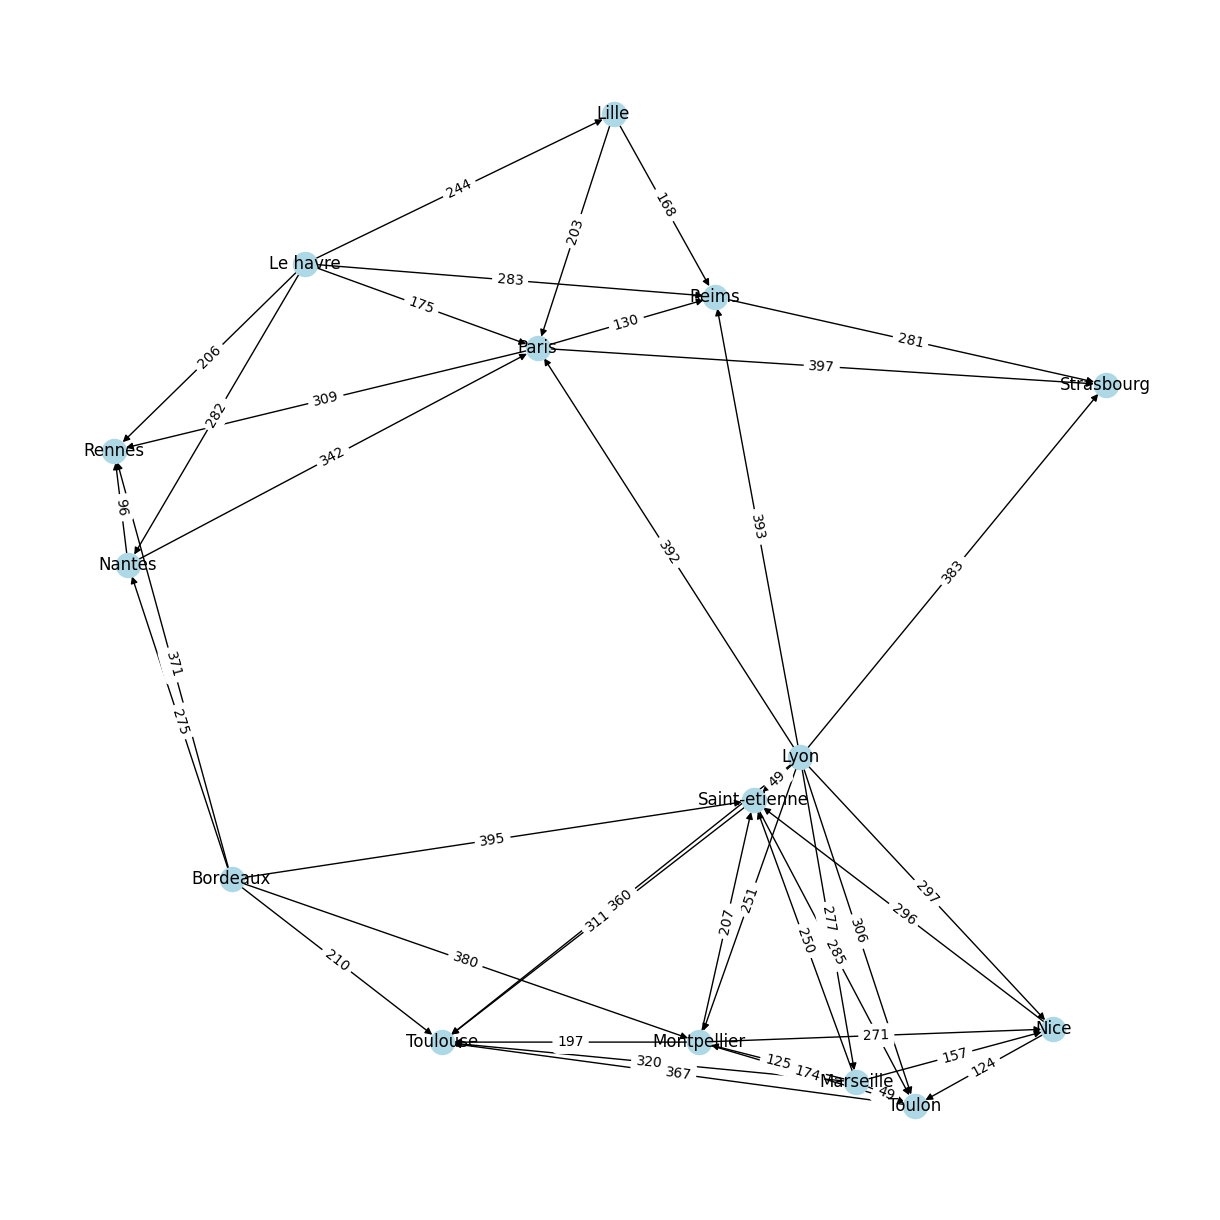

In [20]:
# nouveau graphe orienté
G_oriente = nx.DiGraph()

aretes_orientees = [(u, v) if u < v else (v, u) for u, v in G_grand.edges()]

G_oriente.add_nodes_from(G_grand.nodes())
G_oriente.add_edges_from(aretes_orientees)

# position et poids du graphe
pos_oriente = {u: (p["x"], p["y"]) for u, p in G_grand.nodes(data=True)}
aretes_poids_oriente = {(u,v,): int(d['weight']) for u, v, d in G_grand.edges(data=True)}

# affichage du graphe
plt.figure(figsize=(12,12))
nx.draw(G_oriente, pos_oriente, node_color="lightblue", with_labels=True)
nx.draw_networkx_edge_labels(G_oriente, pos_oriente, edge_labels=aretes_poids_oriente);

**Question 4.** Selon ces règles, quel est le chemin le plus court entre Nice et Toulouse ? Trouvez le et affichez le.

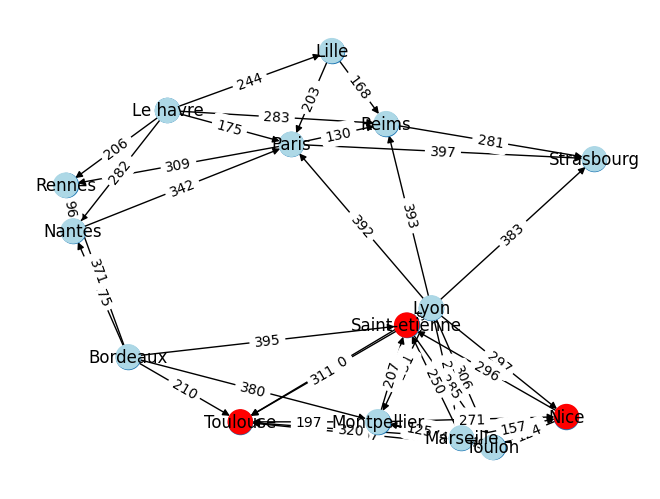

In [25]:
# un algorithme tout fait qui permet de trouver le chemin le plus court dans le graphe
court_chemin = nx.shortest_path(G_oriente, "Nice", "Toulouse", weight="weight")

# des couleurs pour afficher le chemin
couleurs = ["red" if sommet in court_chemin else "lightblue" for sommet in G_oriente]

# affichage du graphe
nx.draw(G_oriente, pos_oriente, with_labels=True)
nx.draw_networkx_edge_labels(G_oriente, pos_oriente, edge_labels=aretes_poids_oriente)
nx.draw_networkx_nodes(G_oriente, pos_oriente, node_color=couleurs)

**Question 5.** Essayez, comme tout à l'heure, de trouver un chemin entre Rennes et Nice. Que se passe-t-il ?

In [24]:
# un algorithme tout fait qui permet de trouver le chemin le plus court dans le graphe
court_chemin = nx.shortest_path(G_oriente, "Rennes", "Nice", weight="weight")

# des couleurs pour afficher le chemin
couleurs = ["red" if sommet in court_chemin else "lightblue" for sommet in G_oriente]

# affichage du graphe
nx.draw(G_oriente, pos_oriente, with_labels=True)
nx.draw_networkx_edge_labels(G_oriente, pos_oriente, edge_labels=aretes_poids_oriente)
nx.draw_networkx_nodes(G_oriente, pos_oriente, node_color=couleurs)

NetworkXNoPath: No path between Rennes and Nice.

*Réponse :*

Il n'y a pas de chemin de Rennes vers Nice.

## V. Graphes eulériens

En 1735, Euler se demande s'il est possible de se promener à Königsberg, en passant une seule fois par les 7 ponts que comporte la ville. C'est un problème fondateur en théorie des graphes, et c'est en représentant ce problème par un graphe qu'Euler trouve la solution.

Les ponts de Königsberg sont répartis comme sur cette image :

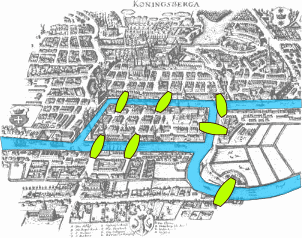

On peut représenter ces ponts par un graphe, où les sommets représentent chaque rive, et les arêtes les ponts.

Contrairement aux graphes que l'on a considérés jusqu'ici, il existe des paires de sommets qui sont reliés par plus d'une arête. On parle ici de **multigraphe**. Voilà le multigraphe qui représente ce problème :

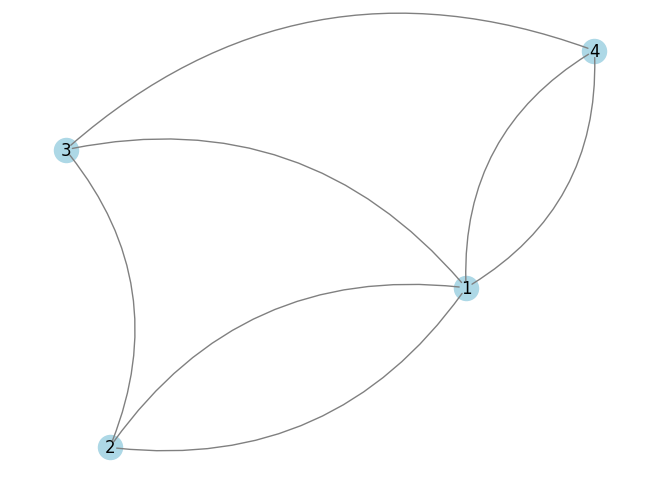

In [26]:
# définir un graphe vide
G_konigsberg = nx.MultiGraph()

# sommets et aretes
sommets_konigsberg = [1, 2, 3, 4]
aretes_konigsberg = [(1,2), (2,1), (1,4), (4,1), (2,3), (4,3), (1,3)]

# rajouter des sommets
G_konigsberg.add_nodes_from(sommets_konigsberg)

# rajouter des arêtes
G_konigsberg.add_edges_from(aretes_konigsberg)

pos_konigsberg = nx.spring_layout(G_konigsberg)


# afficher le graphe
nx.draw(G_konigsberg, pos=pos_konigsberg, with_labels=True, 
        edge_color="white", node_color="lightblue")

# networkx est pas top pour afficher des graphes avec plusieurs arêtes entre les noeuds...
# on va ruser un peu pour voir quelque chose...
ax = plt.gca()
for edge in aretes_konigsberg:
    ax.annotate("",
                xy=pos_konigsberg[edge[0]], xycoords='data',
                xytext=pos_konigsberg[edge[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=-0.3",
                                ),
                )
plt.axis("off");

**Question 6.** Essayer de trouver un chemin qui passe par tous les ponts de Königsberg, c'est-à-dire par toutes les arêtes du graphe `G_konigsberg`. Pensez-vous que c'est possible ?

*Réponse :*

Non, on ne peut pas emprunter tous les ponts.

Un chemin qui passe une seule fois par toutes les arêtes d'un graphe s'appelle un **chemin eulérien**, en référence à Euler qui a posé le problème des ponts de Königsberg.
S'il existe un chemin eulérien *dont le point de départ et le point d'arrivée sont les mêmes*, on dit que le graphe est un **graphe eulérien**. On peut utiliser `networkx` pour savoir si ce graphe est eulérien.

In [27]:
nx.is_eulerian(G_konigsberg)

False

**Question 7.** Donnez un exemple de graphe eulérien. Utilisez la fonction ci-dessus pour vérifier qu'il est bien eulérien.

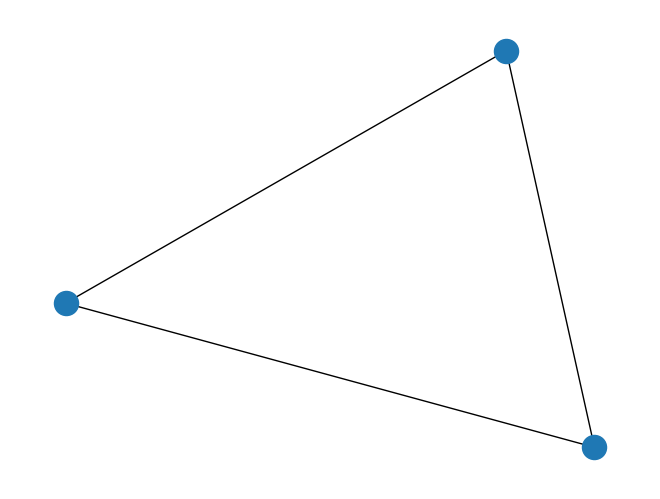

In [28]:
G_eulerien = nx.Graph()

# A COMPLETER
sommets_eulerien = [1,2,3]
aretes_eulerien = [(1,2),(2,3),(3,1)]

G_eulerien.add_nodes_from(sommets_eulerien)
G_eulerien.add_edges_from(aretes_eulerien)

nx.draw(G_eulerien)

In [29]:
nx.is_eulerian(G_eulerien)

True